In [1]:
# Importing important libraries/packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Loading, Editing Data

In [2]:
# Loading data
clustering_data = pd.read_csv("/content/new_data.csv")
clustering_data

,Route,Avg. 2011 Ridership,Avg. 2016 Ridership,Ridership Change %,# of Stops,# of Stops near Subway,Borough
0,BX1,38891,36487,-6%,47,19,Bronx
1,BX2,38891,36487,-6%,50,18,Bronx
2,BX3,15800,14921,-6%,28,3,Bronx
3,BX4,12141,11411,-6%,32,16,Bronx
4,BX4A,12141,11411,-6%,35,13,Bronx
...,...,...,...,...,...,...,...
247,S92,4923,4431,-10%,39,0,Staten Island
248,S93,1646,3686,124%,21,1,Staten Island
249,S94,6755,7016,4%,39,0,Staten Island
250,S96,7126,7299,2%,38,0,Staten Island


In [3]:
# Checking datatypes for each column
print(clustering_data.dtypes)

Route                     object
Avg. 2011 Ridership        int64
Avg. 2016 Ridership        int64
Ridership Change %        object
# of Stops                 int64
# of Stops near Subway     int64
Borough                   object
dtype: object


In [4]:
# dropping percent change
clustering_data = clustering_data.drop('Ridership Change %', axis=1)

# Standardizing Data

In [5]:
# Select relevant features for clustering
selected_features = ['Avg. 2011 Ridership',
                     'Avg. 2016 Ridership',
                     '# of Stops',
                     '# of Stops near Subway']

# Normalize/standardize the selected features
scaler = StandardScaler()
standardized_data = scaler.fit_transform(clustering_data[selected_features])

# Hyper-Parameter Tuning


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

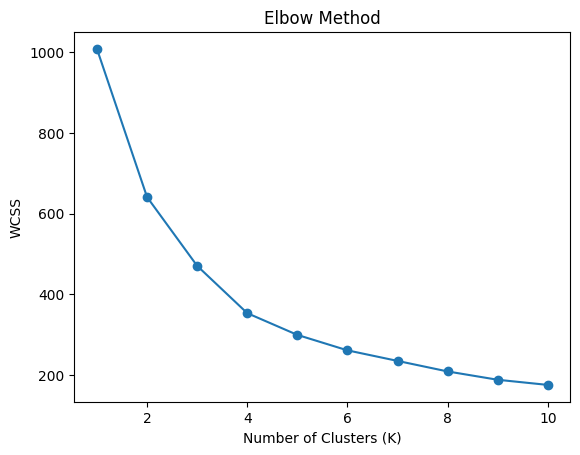

In [6]:
# Using the Elbow method - Trying different values of K

wcss = [] # within cluster sum-of-squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

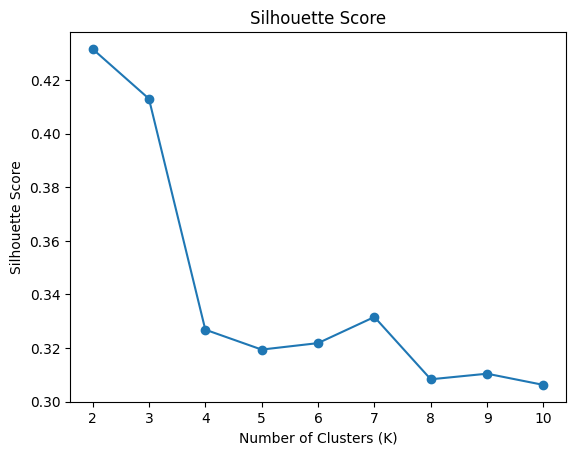

In [7]:
# Using Silhouette Score Method

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(standardized_data)
    silhouette_scores.append(silhouette_score(standardized_data, cluster_labels))

# Plot the Silhouette Score graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()


# Applying the KMeans Clustering with K=5


In [14]:
# Choose the number of clusters (K)
num_clusters = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clustering_data['cluster'] = kmeans.fit_predict(standardized_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


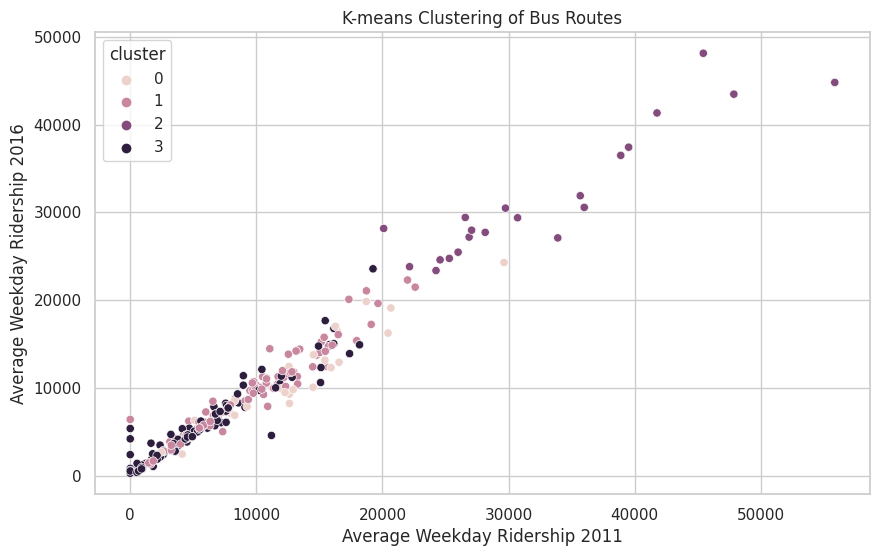

In [15]:
# Visualize the clusters (2D scatter plot)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg. 2011 Ridership', y='Avg. 2016 Ridership', hue='cluster', data=clustering_data)
plt.title('K-means Clustering of Bus Routes')
plt.xlabel('Average Weekday Ridership 2011')
plt.ylabel('Average Weekday Ridership 2016')
plt.show()

# Exploring Cluster Characteristics



         Avg. 2011 Ridership  Avg. 2016 Ridership  # of Stops  \
cluster                                                         
0               13092.482759         11326.586207   53.724138   
1                9569.882353          9497.039216   52.754902   
2               34853.821429         33201.607143   45.107143   
3                5970.698925          5918.064516   24.838710   

         # of Stops near Subway  
cluster                          
0                     18.172414  
1                      3.715686  
2                      7.785714  
3                      3.000000  


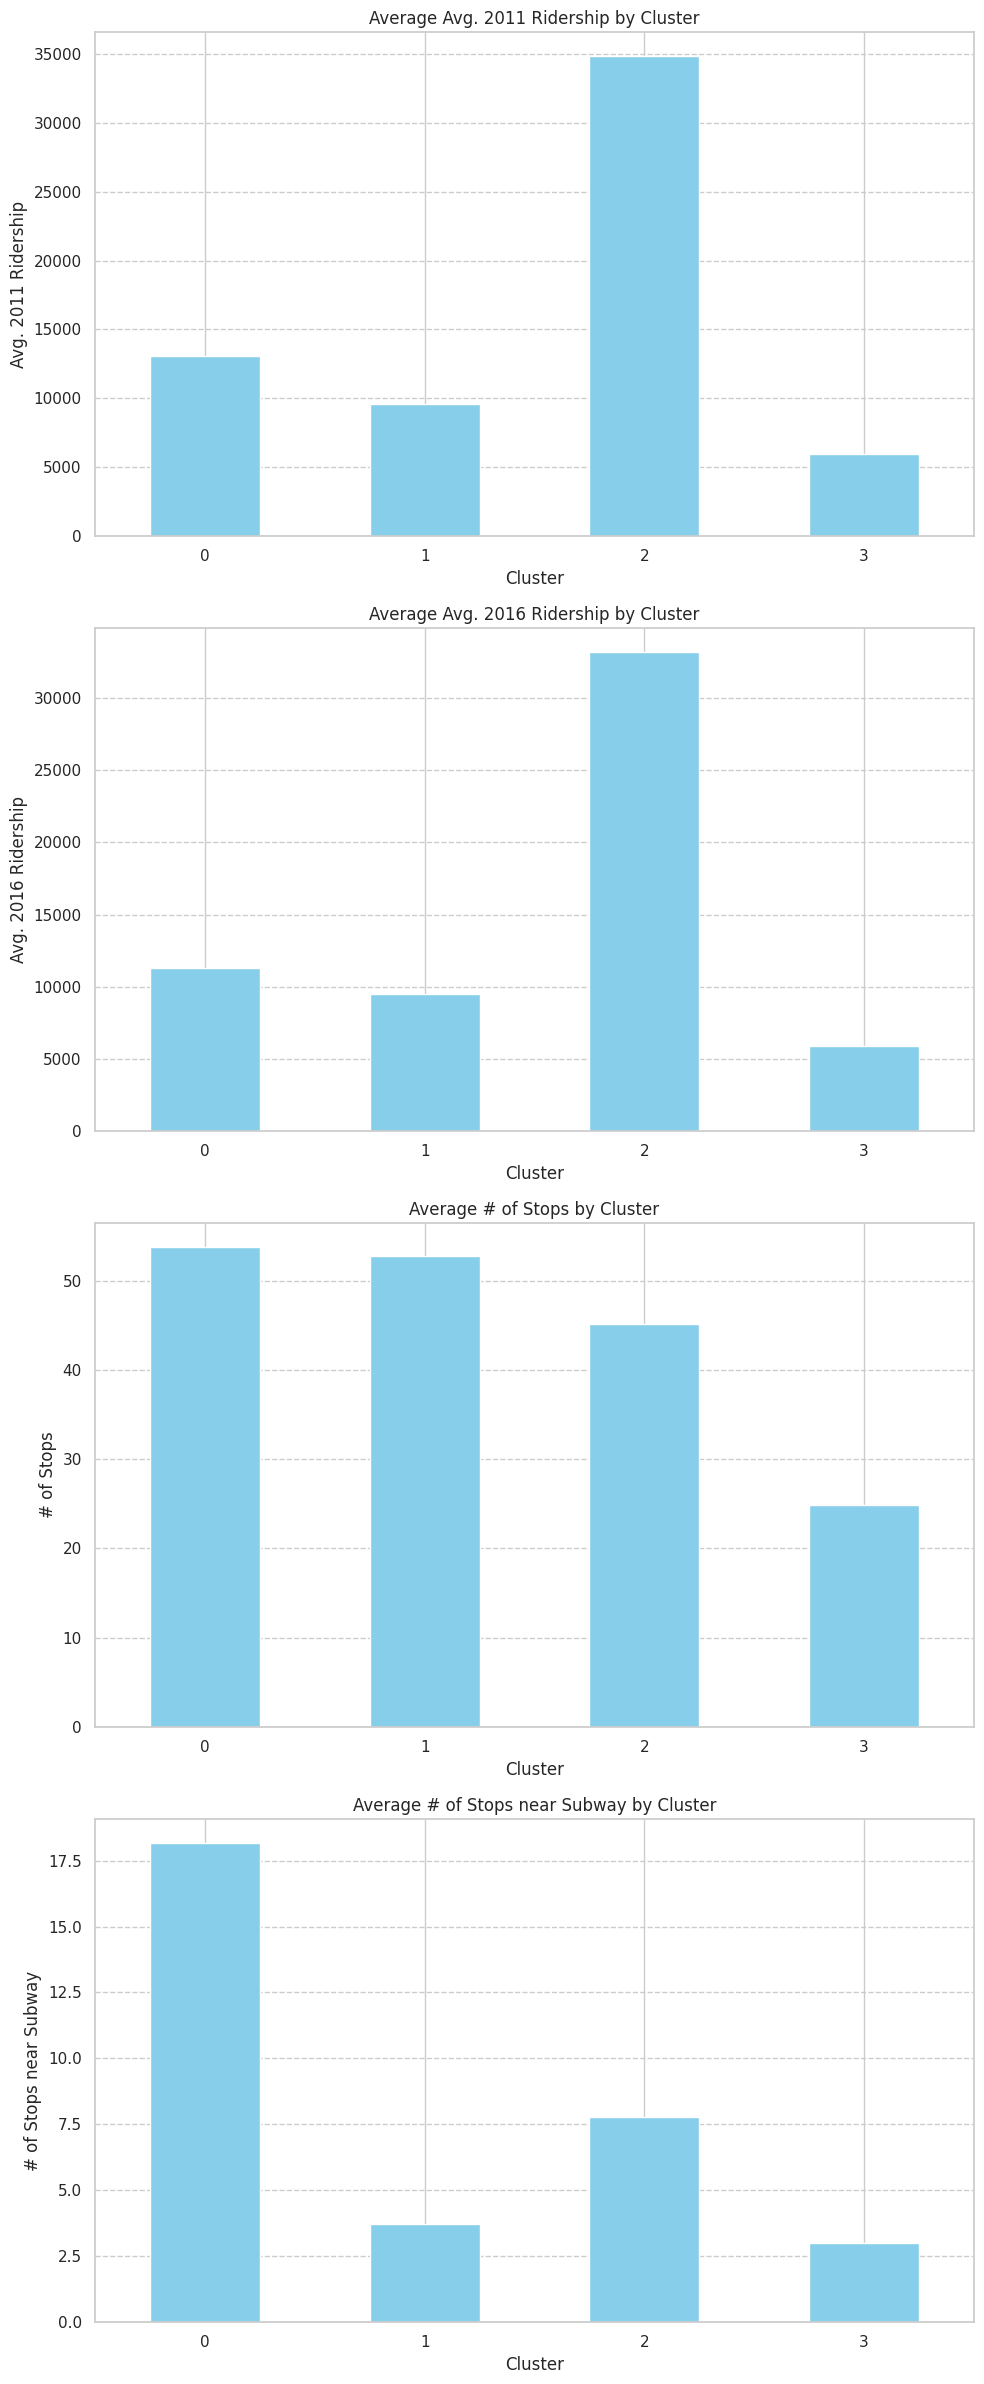

In [16]:
# Explore cluster characteristics
cluster_summary = clustering_data.groupby('cluster')[selected_features].mean()
print(cluster_summary)

# Plot the cluster characteristics
fig, axes = plt.subplots(nrows=len(selected_features), ncols=1, figsize=(10, 6 * len(selected_features)))

for idx, feature in enumerate(selected_features):
    ax = axes[idx]
    cluster_summary[feature].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Average {feature} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(feature)
    ax.set_xticklabels(cluster_summary.index, rotation=0)
    ax.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

Borough  Bronx  Brooklyn  Manhattan  Queens  Staten Island
cluster                                                   
0            3         8         13       5              0
1           14        25          2      43             18
2           11         8          5       4              0
3           15        15         21      29             13


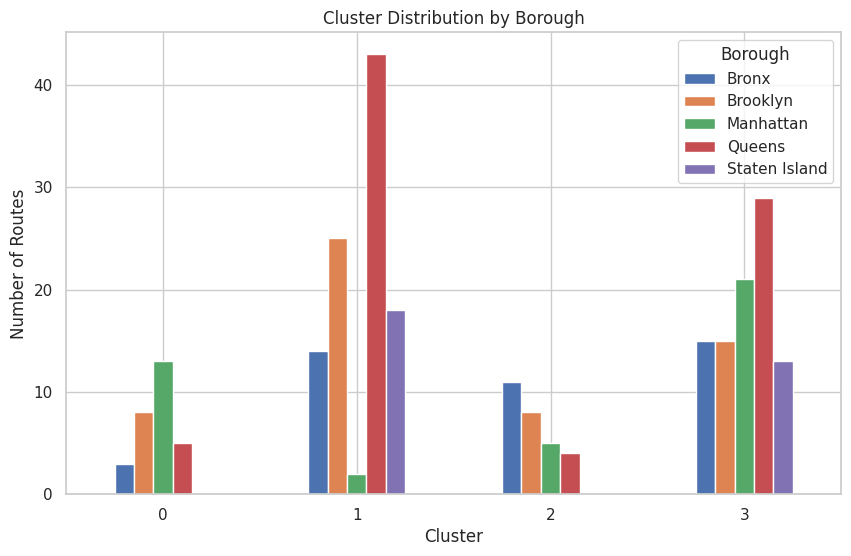

In [17]:
# Profile each cluster based on additional features (e.g., Borough)
borough_distribution = clustering_data.groupby(['cluster', 'Borough']).size().unstack(fill_value=0)
print(borough_distribution)

# Plot the bar chart
borough_distribution.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Cluster Distribution by Borough')
plt.xlabel('Cluster')
plt.ylabel('Number of Routes')
plt.legend(title='Borough', loc='upper right')
plt.xticks(rotation=0)
plt.show()

# Model evaluation

In [12]:
# Evaluating silhouette score
# Higher silhouette scores indicate better-defined clusters.

silhouette_avg = silhouette_score(standardized_data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3194076330569152


In [13]:
# Evaluating Inertia (within-cluster sum of squares)
# Lower inertia values indicate tighter and more compact clusters.
inertia = kmeans.inertia_
print("Inertia:", inertia)


Inertia: 299.38536197832696
